In [44]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import numpy as np
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import ModelCheckpoint

import os
import glob
import scipy

In [45]:
def directory():
    train_dir = "/media/reza/G & S/D/mask dataset/train"
    valid_dir = "/media/reza/G & S/D/mask dataset/valid"
    test_dir = "/media/reza/G & S/D/mask dataset/test"
    return train_dir,valid_dir,test_dir
train_dir,valid_dir,test_dir=directory()

In [46]:


def preprocess(train_dir,valid_dir,test_dir,batch_size,target_size,rescale,zoom_range,vertical_flip,rotation_range):
    train_datagen=ImageDataGenerator(rescale=rescale,zoom_range=zoom_range ,vertical_flip=vertical_flip,rotation_range=rotation_range)
    test_datagen=ImageDataGenerator(rescale=rescale)
    valid_datagen=ImageDataGenerator(rescale=rescale)

    train_generator = train_datagen.flow_from_directory(train_dir,target_size=target_size,batch_size=batch_size,class_mode="binary")

    valid_generator = valid_datagen.flow_from_directory(valid_dir,target_size=target_size,batch_size=batch_size,class_mode="binary")

    test_generator = test_datagen.flow_from_directory(test_dir,target_size=target_size,batch_size=batch_size,class_mode="binary")


    return train_generator,valid_generator,test_generator

    
train_set,valid_set,test_set=preprocess(train_dir,valid_dir,test_dir,batch_size=28,target_size=(150,150),rescale=1./255.,zoom_range=0.2,vertical_flip=True,rotation_range=0.2)



Found 11106 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 558 images belonging to 2 classes.


In [47]:
def model(input_shape,activation,lr):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (5, 5), activation='relu',padding='same',
                        input_shape=(150, 150, 3)))
    model.add(layers.Conv2D(64, (5,5), activation='relu',padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.2))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(256, (5,5), activation='relu',padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(512, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.2))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizers.RMSprop(lr=lr),loss='binary_crossentropy',metrics=['accuracy'])
    return model
model=model(input_shape=(150,150,3),activation='relu',lr=0.0003)

In [48]:
def train(train_set,valid_set,epochs,batch_size):
    filepath="weights-improvement1.hdf5"
    checkpoint = ModelCheckpoint(filepath,monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=True, mode='auto')
    callbacks_list = [checkpoint]
    history = model.fit_generator(train_set,steps_per_epoch=50, 
           epochs=epochs, validation_data=valid_set,callbacks=callbacks_list)
    return history


train_history=train(train_set,valid_set,epochs=40,batch_size=128)


Epoch 1/40
50/50 [==============================] - 52s 899ms/step - loss: 1.3092 - accuracy: 0.4969 - val_loss: 0.9322 - val_accuracy: 0.5280

Epoch 00001: val_loss improved from inf to 0.93216, saving model to weights-improvement1.hdf5
Epoch 2/40
50/50 [==============================] - 42s 841ms/step - loss: 0.9077 - accuracy: 0.6305 - val_loss: 0.6313 - val_accuracy: 0.8850

Epoch 00002: val_loss improved from 0.93216 to 0.63129, saving model to weights-improvement1.hdf5
Epoch 3/40
50/50 [==============================] - 42s 839ms/step - loss: 0.7727 - accuracy: 0.6594 - val_loss: 0.5209 - val_accuracy: 0.8260

Epoch 00003: val_loss improved from 0.63129 to 0.52088, saving model to weights-improvement1.hdf5
Epoch 4/40
50/50 [==============================] - 42s 837ms/step - loss: 0.5210 - accuracy: 0.8086 - val_loss: 0.4873 - val_accuracy: 0.8440

Epoch 00004: val_loss improved from 0.52088 to 0.48726, saving model to weights-improvement1.hdf5
Epoch 5/40
50/50 [==================

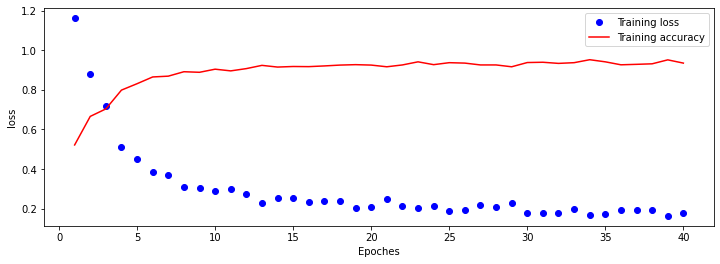

In [49]:
def plot(history,figsize,y,x):
    history_dict=history.history
    loss=history_dict[y]
    acc=history_dict[x]
    epoch=range(1,len(acc)+1)
    plt.figure(figsize=figsize)
    plt.plot(epoch,loss,'bo',label='Training loss')
    plt.plot(epoch,acc,'r',label='Training accuracy')
    plt.xlabel('Epoches')
    plt.ylabel('loss')
    plt.legend()
plot(train_history,(12,4),y='loss',x='accuracy')


In [50]:
def test(test_set):
    results = model.evaluate(test_set)
    return results

results=test(test_set)
print("test set resulat is",results)


20/20 [==============================] - 24s 1s/step - loss: 0.2857 - accuracy: 0.9068
test set resulat is [0.2856733500957489, 0.9068100452423096]


In [51]:
 def save(name):
     model.save(name)

save("mask")

INFO:tensorflow:Assets written to: mask/assets


In [52]:
model.load_weights("weights-improvement1.hdf5")

In [53]:
    model.compile(optimizer=optimizers.RMSprop(lr=0.0006),loss='binary_crossentropy',metrics=['accuracy'])


In [54]:
def test_best(test_set):
    results = model.evaluate(test_set)
    return results

results=test_best(test_set)
print(results)

20/20 [==============================] - 13s 572ms/step - loss: 0.2576 - accuracy: 0.9039
[0.23436865210533142, 0.9157705903053284]
